In [1]:
import torch
import torch.nn as nn
import sklearn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=make_regression(n_samples=1000, # number of samples
                     n_features=3,  # number of features
                     n_informative=3,   # number of useful features
                     random_state=42  # set for same data points for each run
                     )

In [3]:
type(data)

tuple

In [4]:
data

(array([[-0.5391227 , -0.60787526, -0.83726243],
        [-1.4066611 , -0.6115178 , -0.75538293],
        [ 0.68189149,  1.04416088, -0.48943944],
        ...,
        [ 0.6404798 , -0.46649538,  0.99657051],
        [-1.13883312,  0.62220714,  0.30047436],
        [-0.95643638, -1.29327296,  0.71975794]]),
 array([-1.42338105e+02, -1.58520012e+02,  8.03345971e+01, -1.68176389e+02,
         1.81493775e+02,  1.04678329e+02,  2.02397931e+02, -1.18139772e+02,
        -9.77690126e+01,  2.89617852e+01, -3.73589172e+01,  1.20328037e+02,
         3.60634016e+01, -1.38066226e+02,  2.01625663e+02,  1.77481385e+02,
         1.78713265e+02,  1.33321395e+02,  2.77336225e+01, -2.84102770e+01,
         4.13132572e+01,  2.28608309e+02, -3.14158826e+01, -1.33728801e+01,
        -9.93324279e+01, -4.97151414e+01, -1.08320706e+02, -8.85686626e+01,
         1.96209329e+02,  3.21662512e+01,  6.22223526e+00, -9.89209172e+01,
        -1.22413703e+02, -1.82923988e+02, -1.20697452e+02,  9.07472329e+01,
       

In [5]:
X=data[0]
y=data[1]

In [6]:
X.shape

(1000, 3)

### Transforming data features into data frames with columns research , Salaries, Infrastructure and Expenditure

In [7]:
Research=X[:,0]
Salaries=X[:,1]
Infrastructure=X[:,2]

In [8]:
Research = np.interp(Research, (Research.min(), Research.max()), (0, 2000))
Salaries = np.interp(Salaries, (Salaries.min(), Salaries.max()), (0, 1500))
Infrastructure = np.interp(Infrastructure, (Infrastructure.min(), Infrastructure.max()), (0, 2500))


In [9]:
y = data[1]
y.shape

(1000,)

In [10]:
y = np.interp(y, (y.min(), y.max()), (6000, 20000))

In [11]:
Expenditures = y

In [12]:
df = pd.DataFrame(index = ['Research', 'Salaries','Infrastructure', 'Expenditures'],
                        data = [Research, Salaries, Infrastructure, Expenditures]).T


In [13]:
df

,Research,Salaries,Infrastructure,Expenditures
0,721.857251,613.903942,765.705784,10160.329845
1,469.381222,613.054782,795.516457,9906.531892
2,1077.203847,999.031362,892.341111,13652.741259
3,883.301188,427.943743,935.641612,9755.080727
4,1258.683826,945.261280,1371.053555,15239.327596
...,...,...,...,...
995,944.144896,662.449234,1699.288797,14085.407676
996,835.747970,637.154467,626.099384,9981.171495
997,1065.151976,646.862827,1433.367330,13213.698646
998,547.326065,900.664293,1179.932777,13274.638267


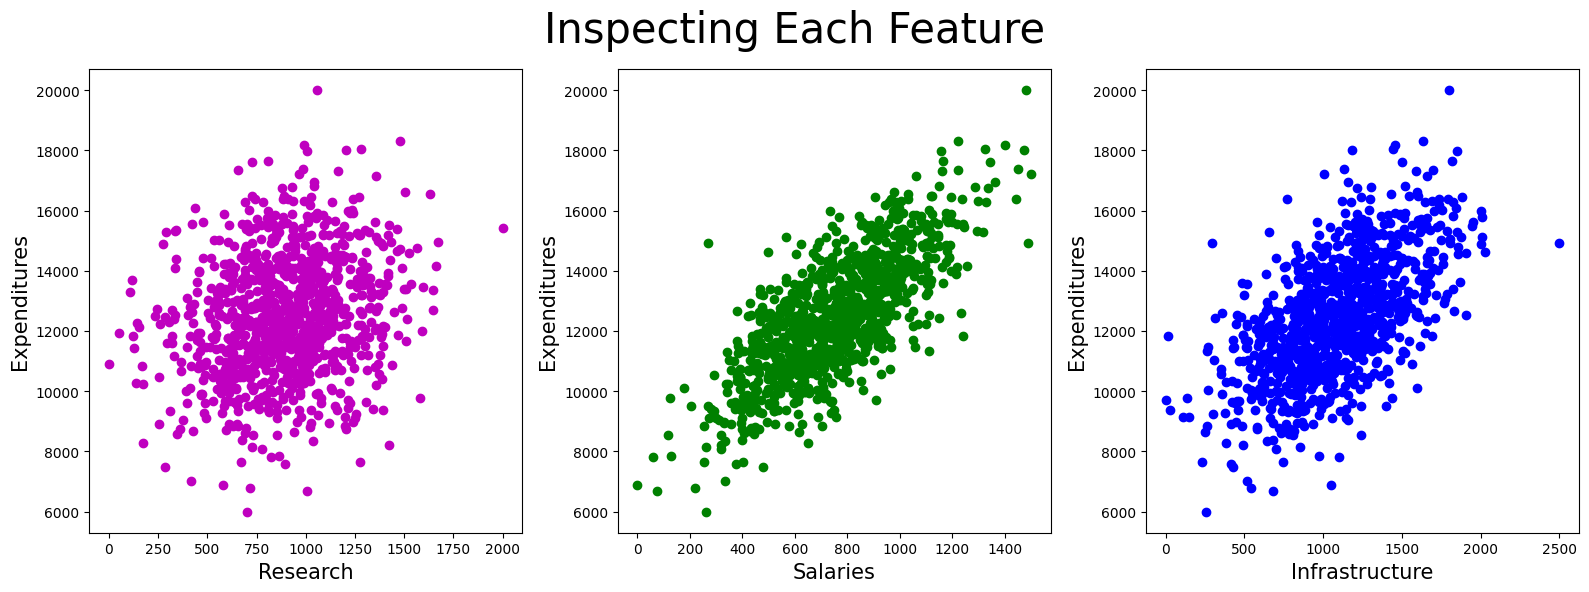

In [14]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))
plt.suptitle('Inspecting Each Feature', fontsize = 30)

axes[0].plot(df['Research'],df['Expenditures'],'mo')
axes[0].set_ylabel("Expenditures", fontsize = 15)
axes[0].set_xlabel("Research", fontsize = 15)

axes[1].plot(df['Salaries'],df['Expenditures'],'go')
axes[1].set_ylabel("Expenditures", fontsize = 15)
axes[1].set_xlabel("Salaries", fontsize = 15)

axes[2].plot(df['Infrastructure'],df['Expenditures'],'bo')
axes[2].set_ylabel("Expenditures", fontsize = 15)
axes[2].set_xlabel("Infrastructure", fontsize = 15)

plt.tight_layout();

In [15]:
X = df.iloc[:,:-1]

In [16]:
X

,Research,Salaries,Infrastructure
0,721.857251,613.903942,765.705784
1,469.381222,613.054782,795.516457
2,1077.203847,999.031362,892.341111
3,883.301188,427.943743,935.641612
4,1258.683826,945.261280,1371.053555
...,...,...,...
995,944.144896,662.449234,1699.288797
996,835.747970,637.154467,626.099384
997,1065.151976,646.862827,1433.367330
998,547.326065,900.664293,1179.932777


In [17]:
X.shape

(1000, 3)

In [18]:
y = df.iloc[:,-1]
y.shape

(1000,)

In [19]:
X

,Research,Salaries,Infrastructure
0,721.857251,613.903942,765.705784
1,469.381222,613.054782,795.516457
2,1077.203847,999.031362,892.341111
3,883.301188,427.943743,935.641612
4,1258.683826,945.261280,1371.053555
...,...,...,...
995,944.144896,662.449234,1699.288797
996,835.747970,637.154467,626.099384
997,1065.151976,646.862827,1433.367330
998,547.326065,900.664293,1179.932777


In [20]:
y

,Expenditures
0,10160.329845
1,9906.531892
2,13652.741259
3,9755.080727
4,15239.327596
...,...
995,14085.407676
996,9981.171495
997,13213.698646
998,13274.638267


### Splitting data into test and train

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
X_test.shape, y_test.shape

((200, 3), (200,))

In [23]:
X_train.shape,y_train.shape

((800, 3), (800,))

In [24]:
X_train

,Research,Salaries,Infrastructure
29,431.864791,865.010584,1185.642130
535,907.182112,758.549149,1152.123677
695,823.197928,1176.248398,1248.160577
557,1099.210115,898.789881,990.085560
836,448.354472,846.952050,871.659556
...,...,...,...
106,1198.055564,253.620072,879.017465
270,648.009424,631.998390,1254.049288
860,1046.548785,697.557574,1669.435659
435,670.861179,823.935471,1155.095011


In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
X_train

array([[-1.58578602,  0.47584011,  0.26215301],
       [ 0.03839851,  0.02347754,  0.16596997],
       [-0.24857991,  1.79831278,  0.44155313],
       ...,
       [ 0.51462183, -0.23568021,  1.65042511],
       [-0.76912267,  0.3013089 ,  0.17449638],
       [ 1.37701692, -1.22871643,  0.29965884]])

In [27]:
type(X_train),type(X_test),type(y_train),type(y_test)

(numpy.ndarray,
 numpy.ndarray,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [28]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [29]:
type(X_train),type(X_test),type(y_train),type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

### Transform to pytorch tensor

In [30]:
X_train=torch.tensor(X_train,dtype=torch.float32)
X_test=torch.tensor(X_test,dtype=torch.float32)
y_train=torch.tensor(y_train,dtype=torch.float32)
y_test=torch.tensor(y_test,dtype=torch.float32)

In [34]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

(torch.Size([800, 3]),
 torch.Size([200, 3]),
 torch.Size([800]),
 torch.Size([200]))

In [37]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [38]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

(torch.Size([800, 3]),
 torch.Size([200, 3]),
 torch.Size([800, 1]),
 torch.Size([200, 1]))

## Create neural network for multiple regression

In [39]:
model=nn.Sequential(
    nn.Linear(3,1)
)
model

Sequential(
  (0): Linear(in_features=3, out_features=1, bias=True)
)

In [40]:
learningRate=0.01
lossFunction=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learningRate)

In [41]:
epochs=1001
losses=torch.zeros(epochs)
for epoch in range(epochs):
  y_pred=model(X_train)
  loss=lossFunction(y_pred,y_train)
  losses[epoch]=loss
  # Backpropagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if epoch%100==0:
    print(f"Epoch: {epoch} Loss: {loss.detach()}")


Epoch: 0 Loss: 159728320.0
Epoch: 100 Loss: 2826841.25
Epoch: 200 Loss: 50207.32421875
Epoch: 300 Loss: 896.1442260742188
Epoch: 400 Loss: 16.115989685058594
Epoch: 500 Loss: 0.29255297780036926
Epoch: 600 Loss: 0.005530810449272394
Epoch: 700 Loss: 0.0005977395339868963
Epoch: 800 Loss: 0.000597565493080765
Epoch: 900 Loss: 0.000597565493080765
Epoch: 1000 Loss: 0.000597565493080765


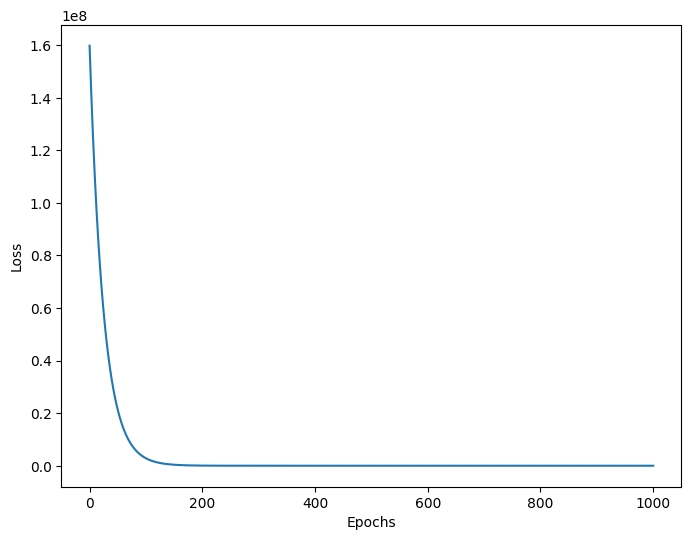

In [44]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(epochs),losses.detach())
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

### Weight and bias value

In [47]:
model[0].weight.detach().numpy()

array([[ 409.54294, 1557.3359 , 1229.1144 ]], dtype=float32)

In [48]:
model[0].bias.detach().numpy()

array([12483.427], dtype=float32)

### Testing and Evaluating the model

In [49]:
y_pred=model(X_test)

In [50]:
y_pred = y_pred.detach().numpy()
y_test = y_test.detach().numpy()

In [51]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAE:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

RMSE: 0.02456831126788726
MAE: 0.1550736971974938
R2: 1.0
